In [3]:
# Import necessary libraries
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Taha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


1. Data Loading

In [16]:
# Load the dataset into a pandas DataFrame.
# The dataset includes columns such as Email_ID , Subject , Body , and Category (where Category indicates whether the email is "Spam" or"Important").
# Display the first few rows of the dataset to understand its structure.

In [4]:
# Loading the file while skipping any bad lines and handling errors during parsing
df = pd.read_csv('emails.csv', on_bad_lines="skip")

# Display the first few rows of the dataset after handling the error
df.head()

,Email_ID,Subject,Body,Category
0,1,Sale on Electronics,Get 50% off on all electronics today!,Spam
1,2,Meeting Reminder,Don’t forget the team meeting tomorrow at 10 AM.,Important
2,3,Win a Free Vacation,Claim your free vacation now! Click here!,Spam
3,4,Project Update,The latest project update is available on the ...,Important
4,5,Discount Offer,Exclusive 30% discount on your next purchase!,Spam


2.  Data Cleaning and Preprocessing

In [17]:
# Missing Values: Identify and handle missing values in the Subject and Body columns.
# Text Cleaning:
    # Remove any unnecessary whitespace from the Subject and Body .
    # Convert text to lowercase.
    # Remove punctuation, numbers, and special characters.
    # Tokenize the text (split into words).
# Stop Words Removal: Optionally, remove common stop words that do not contribute to the classificatio

In [5]:
# Checking for missing values in the Subject and Body columns
missing_values = df[['Subject', 'Body']].isnull().sum()

# Display missing values count
missing_values


Subject    0
Body       0
dtype: int64

In [6]:
#Text Cleaning
# Initialize stop words
stop_words = set(stopwords.words('english'))

# Function to clean text
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize the text
    words = text.split()
    # Remove stop words (optional)
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Apply the cleaning function to both Subject and Body
df['cleaned_subject'] = df['Subject'].apply(clean_text)
df['cleaned_body'] = df['Body'].apply(clean_text)

# Combine cleaned_subject and cleaned_body
df['text'] = df['cleaned_subject'] + ' ' + df['cleaned_body']

# Show cleaned data
df[['text', 'Category']].head()

,text,Category
0,sale electronics get electronics today,Spam
1,meeting reminder dont forget team meeting tomo...,Important
2,win free vacation claim free vacation click,Spam
3,project update latest project update available...,Important
4,discount offer exclusive discount next purchase,Spam


3. Feature Extraction

In [18]:
# Text Vectorization: Convert the cleaned text data into numerical format using techniques such as:
    # Bag of Words (BoW): Represents text data as a matrix of token counts.
    # Term Frequency-Inverse Document Frequency (TF-IDF): Represents text data by highlighting important words.
# Choose the most suitable vectorization method based on your analysis

In [7]:
# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# Fit and transform the text data
X = tfidf_vectorizer.fit_transform(df['text'])

# Define target variable
y = df['Category']

# Display feature names
print(tfidf_vectorizer.get_feature_names_out())

['account' 'act' 'activity' 'advantage' 'agenda' 'alert' 'announce'
 'announcement' 'annual' 'another' 'apparel' 'appliances' 'application'
 'apply' 'appointment' 'appreciate' 'approaching' 'arrivals' 'arrive'
 'attached' 'available' 'back' 'big' 'buy' 'card' 'chance' 'changes'
 'check' 'claim' 'click' 'client' 'clothing' 'code' 'company'
 'confirmation' 'confirmed' 'congratulations' 'contact' 'contest' 'credit'
 'customer' 'customers' 'data' 'date' 'days' 'deadline' 'deal' 'deals'
 'details' 'detected' 'development' 'discount' 'discounts' 'discover'
 'document' 'dont' 'download' 'due' 'electronics' 'ending' 'ends' 'enjoy'
 'enter' 'event' 'excited' 'exclusive' 'experience' 'explore' 'extended'
 'extension' 'extra' 'fast' 'feature' 'feedback' 'fill' 'final'
 'financial' 'first' 'flash' 'following' 'followup' 'forget' 'free'
 'friday' 'get' 'gift' 'great' 'happening' 'help' 'hiring' 'home' 'huge'
 'important' 'improve' 'information' 'insurance' 'interview' 'intranet'
 'introductory' 'in

4. Data Splitting

In [19]:
# Split the dataset into training and testing sets (e.g., 80% training, 20% testing).
# Ensure that the split maintains the balance of categories.

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

5. Model Building

In [20]:
# Model Selection: Choose a classification algorithm such as:
    # Logistic Regression
    # Naive Bayes
    # Support Vector Machine (SVM)
    # Random Forest
# Training: Train the model using the training dataset.
# Hyperparameter Tuning: Optionally, use techniques like Grid Search or Random Search to find the best hyperparameters for your model.

In [10]:
# Initialize and train the Logistic Regression model
reg = LogisticRegression(random_state=42)
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)
print(y_pred)

['Important' 'Important' 'Spam' 'Spam' 'Important' 'Important' 'Important'
 'Spam' 'Important' 'Spam' 'Important' 'Spam' 'Spam' 'Important' 'Spam'
 'Important' 'Important' 'Important' 'Spam' 'Important' 'Spam' 'Spam'
 'Spam' 'Important' 'Important' 'Spam' 'Important' 'Important' 'Important'
 'Spam' 'Important' 'Important' 'Important' 'Spam' 'Spam' 'Spam'
 'Important' 'Important' 'Spam' 'Spam' 'Important' 'Important']


6. Model Evaluation

In [21]:
# Performance Metrics: Evaluate the model’s performance using metrics such as:
    # Accuracy
    # Precision
    # Recall
    # F1 Score
    # Confusion Matrix
# Cross-Validation: Optionally, perform cross-validation to ensure the robustness of your model.

Accuracy:  0.9285714285714286
Precision:  0.875
Recall:  1.0
F1 Score:  0.9333333333333333


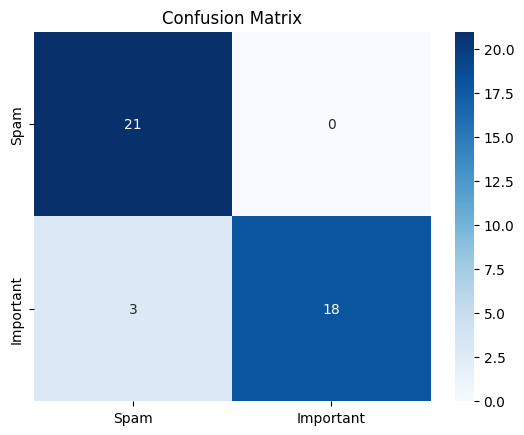

Cross-Validation Accuracies:  [0.90909091 0.96969697 0.96969697 0.93939394 0.9375    ]
Mean Cross-Validation Accuracy:  0.9450757575757576


<Figure size 640x480 with 0 Axes>

In [13]:
# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Important')
recall = recall_score(y_test, y_pred, pos_label='Important')
f1 = f1_score(y_test, y_pred, pos_label='Important')

# Display metrics
print('Accuracy: ',accuracy)
print('Precision: ',precision)
print('Recall: ',recall)
print('F1 Score: ',f1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Spam', 'Important'], yticklabels=['Spam', 'Important'])
plt.title('Confusion Matrix')
plt.show()

# Save the confusion matrix as an image
plt.savefig('confusion_matrix.png')

# Perform 5-fold cross-validation
cv_scores = cross_val_score(reg, X_train, y_train, cv=5, scoring='accuracy')

# Display the accuracy for each fold
print('Cross-Validation Accuracies: ',cv_scores)

# Calculate and display the mean accuracy
mean_cv_accuracy = cv_scores.mean()
print('Mean Cross-Validation Accuracy: ',mean_cv_accuracy)

7. Model Interpretation

In [22]:
# Feature Importance: Analyze the most important features (words) used by the model to classify emails.
# Misclassifications: Review some of the misclassified emails to understand potential reasons for errors.

In [15]:
#Feature Importance
# Get the feature names (words) from the TF-IDF vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Get the coefficients from the trained Logistic Regression model
coefficients = reg.coef_.flatten()

# Create a DataFrame to show the words with their corresponding coefficients
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': coefficients})

# Sort by importance (highest to lowest)
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display the top 10 most important words for classification
print("Top 10 words indicating 'Important' emails:")
print(feature_importance.head(10))

print("\nTop 10 words indicating 'Spam' emails:")
print(feature_importance.tail(10))

# Misclassification
# Identify misclassified emails
misclassified_indices = np.where(y_pred != y_test)[0]

# Display a few misclassified examples
print("Examples of misclassified emails:")
for i in misclassified_indices[:5]:  # Display the first 5 misclassified examples
    print('Subject: ',{df.iloc[i]['Subject']})
    print('Actual: ',{y_test.iloc[i]}, 'Predicted: ', {y_pred[i]})
    print('Body: ', df.iloc[i]['Body'])
    print("-" * 50)


Top 10 words indicating 'Important' emails:
       Feature  Importance
201       sale    1.687521
82        free    1.624478
65   exclusive    1.518438
224    special    1.310458
51    discount    1.163364
140      offer    1.015297
84         get    0.973571
78       flash    0.925162
85        gift    0.741680
248      today    0.739124

Top 10 words indicating 'Spam' emails:
          Feature  Importance
103       invoice   -0.737551
259        update   -0.755936
129       monthly   -0.804148
197        review   -0.868423
34   confirmation   -0.926589
258      upcoming   -0.957478
184        recent   -0.965761
122       meeting   -1.005978
190      reminder   -1.017361
0         account   -1.078603
Examples of misclassified emails:
Subject:  {'Special Sale Event'}
Actual:  {'Spam'} Predicted:  {'Important'}
Body:  Join our special sale event and save big!
--------------------------------------------------
Subject:  {'Monthly Newsletter'}
Actual:  {'Spam'} Predicted:  {'Important'}
B

In [24]:
# Save the cleaned and preprocessed dataset to a new CSV file
cleaned_csv_path = 'cleaned_emails.csv'
df[['Email_ID', 'text', 'Category']].to_csv(cleaned_csv_path, index=False)

# Provide the path for download
cleaned_csv_path


'cleaned_emails.csv'